<a href="https://colab.research.google.com/github/arthurl800/langchainProjeto/blob/main/Projeto_de_Pesquisa_Langchain_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Pesquisa, informações:

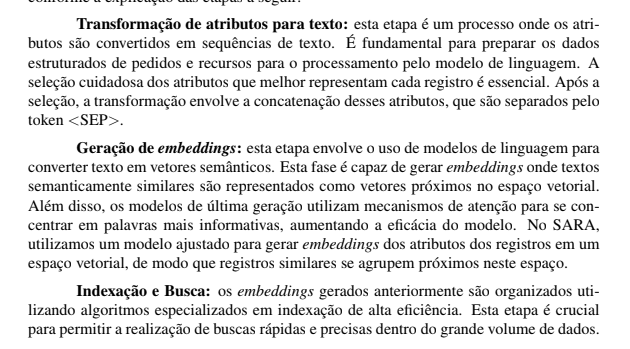

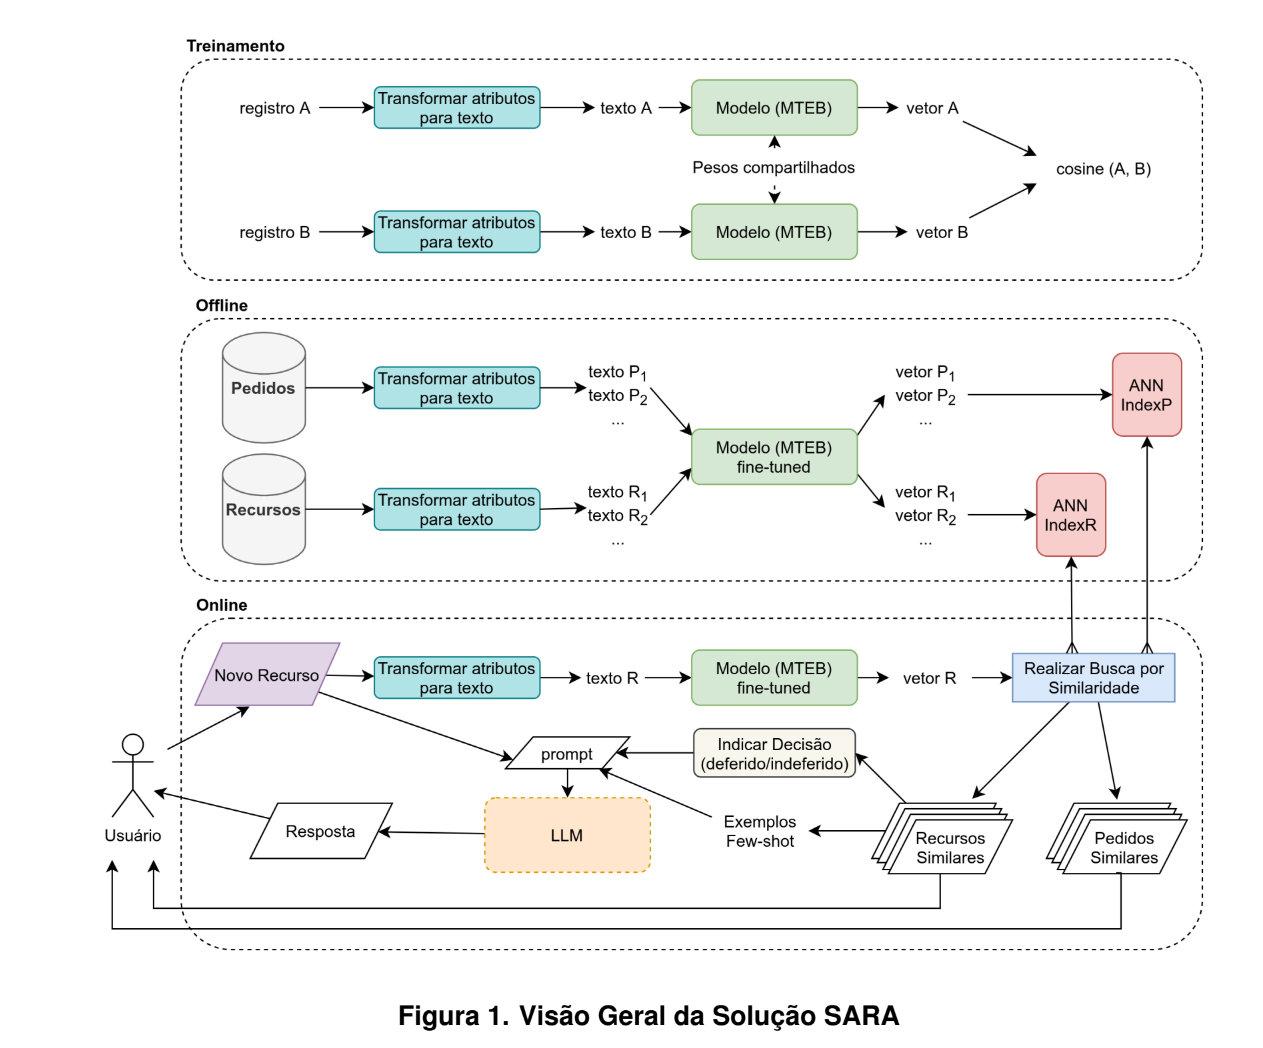

# Códigos

In [1]:
#Montar o drive para leitura
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install langchain
!pip install langchain_community
!pip install langchain_experimental
!pip install the llama-cpp-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 9.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.1 MB/s eta 0:00:00
  Created wheel for the: filename=the-0.1.5-py3-none-any.whl size=5988 sha256=78db52ee8e099bfd875663af7ea33739019e8c94dee91011a35f695fa4b6331b
  Stored in directory: /root/.cache/pip/wheels/5a/02/15/82fa3d852099cde5adb558437baaa511bc9ad4a7febdae2ecb
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.3.7-cp311-cp311-linux_x86_64.whl size=4552816 sha256=5ce3fb8dc9c3e23c812

In [ ]:
#Importar itens necessários
import os
import sys
import pandas as pd
from langchain.llms import Replicate
from langchain.vectorstores import Pinecone
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.chains import ConversationalRetrievalChain
from langchain.document_loaders.csv_loader import CSVLoader
from langchain.llms import HuggingFaceHub
from getpass import getpass
from langchain_experimental.agents.agent_toolkits import create_csv_agent
from langchain.llms import LlamaCpp
from langchain.document_loaders.csv_loader import CSVLoader

In [ ]:
#Informar Token do Hugging Face
os.environ["HUGGINGFACEHUB_API_TOKEN"] = getpass("HF Token:")

HF Token:··········


In [ ]:
#Caminho do arquivo CSV
path="/content/drive/MyDrive/Colab Notebooks/Arquivos_csv_2023/20240928_Pedidos_csv_2023.csv"

In [ ]:
#Conversão do arquivo CSV para "utf-16"
with open(path, encoding='utf-16') as f:
    states_list = [line.strip() for line in f.readlines()]

In [ ]:
#Documentação para carregar arquivos CSV:
#https://python.langchain.com/api_reference/community/document_loaders/langchain_community.document_loaders.csv_loader.CSVLoader.html
#https://python.langchain.com/docs/how_to/document_loader_csv/


#Carregar arquivos CSV
loader = CSVLoader(file_path=states_list)
documents = loader.load()

Buffered data was truncated after reaching the output size limit.

In [ ]:
#Carregar o modelo
llm_cpp = LlamaCpp(
            streaming = True,
            model_path="/content/drive/MyDrive/Colab Notebooks/zephyr-7b-beta.Q4_0.gguf",
            n_gpu_layers=2,
            n_batch=512,
            temperature=0.75,
            top_p=1,
            verbose=True,
            n_ctx=4096,
            )

llama_model_loader: loaded meta data with 21 key-value pairs and 291 tensors from /content/drive/MyDrive/Colab Notebooks/zephyr-7b-beta.Q4_0.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = huggingfaceh4_zephyr-7b-beta
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv  

In [ ]:
#Prompt de pergunta, para receber a resposta
query = "Qual é a resposta mais frequente na coluna F da planilha?"

prompt = f"""
 <|system|>
You are an AI assistant that follows instruction extremely well.
Please be truthful and give direct answers
Please summarize in a maximum of ten words
</s>
 <|user|>
 {query}
 </s>
 <|assistant|>
"""

response = llm_cpp.predict(prompt)
print(response)

<ipython-input-13-b45494ab8a96>:16: LangChainDeprecationWarning: The method `BaseLLM.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm_cpp.predict(prompt)
llama_perf_context_print:        load time =   27986.56 ms
llama_perf_context_print: prompt eval time =   27980.52 ms /    79 tokens (  354.18 ms per token,     2.82 tokens per second)
llama_perf_context_print:        eval time =   44800.06 ms /    52 runs   (  861.54 ms per token,     1.16 tokens per second)
llama_perf_context_print:       total time =   72872.08 ms /   131 tokens


 Na coluna F da planilha, a resposta mais frequente é: (você deve fornecer o conteúdo da coluna F aqui ou indicar qual planilha está sendo discutida).
